In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [11]:
neighborhoodab = gpd.read_file('../data/nba.geojson')
print(neighborhoodab.crs)
neighborhoodab.head( )

epsg:4326


,name,geometry
0,Historic Buena Vista,"MULTIPOLYGON (((-86.79511 36.17576, -86.79403 ..."
1,Charlotte Park,"MULTIPOLYGON (((-86.87460 36.15758, -86.87317 ..."
2,Hillwood,"MULTIPOLYGON (((-86.87614 36.13554, -86.87583 ..."
3,East Hill,"MULTIPOLYGON (((-86.74659 36.20376, -86.74559 ..."
4,Cleveland Park,"MULTIPOLYGON (((-86.75606 36.18857, -86.75600 ..."


In [13]:
type(neighborhoodab)

geopandas.geodataframe.GeoDataFrame

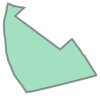

In [14]:
neighborhoodab.loc[0, 'geometry']

In [15]:
print(neighborhoodab.loc[0, 'geometry'])

MULTIPOLYGON (((-86.79511056795417 36.17575964963348, -86.79403325521203 36.17672381962277, -86.79395847673587 36.17673420120556, -86.79373059621346 36.17641850227536, -86.79345684770965 36.1760073285478, -86.7933653702227 36.17592609720739, -86.79294909679425 36.17527664780614, -86.79276591717007 36.17511962002857, -86.79252941560033 36.17471240878589, -86.79204396927803 36.17393170332863, -86.79167790414918 36.17334940652481, -86.7916936044697 36.17329298843413, -86.79203101691085 36.1731861114189, -86.79474163086816 36.17249213438422, -86.79601903802255 36.17218267273473, -86.79764416397879 36.17179978743778, -86.79830164245051 36.17168336043859, -86.79879977448026 36.17243166386886, -86.79924036890505 36.1729960002125, -86.79949254372757 36.1733962443001, -86.79962585216791 36.17371402180879, -86.79978177579596 36.17412395085653, -86.8000340272343 36.17467828643516, -86.80014485213776 36.17518521060327, -86.80021778306909 36.17542866685226, -86.80031177458922 36.17668510380093, -86

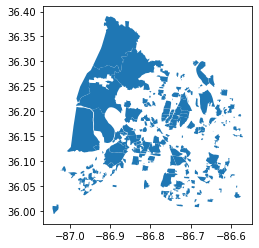

In [16]:
neighborhoodab.plot();

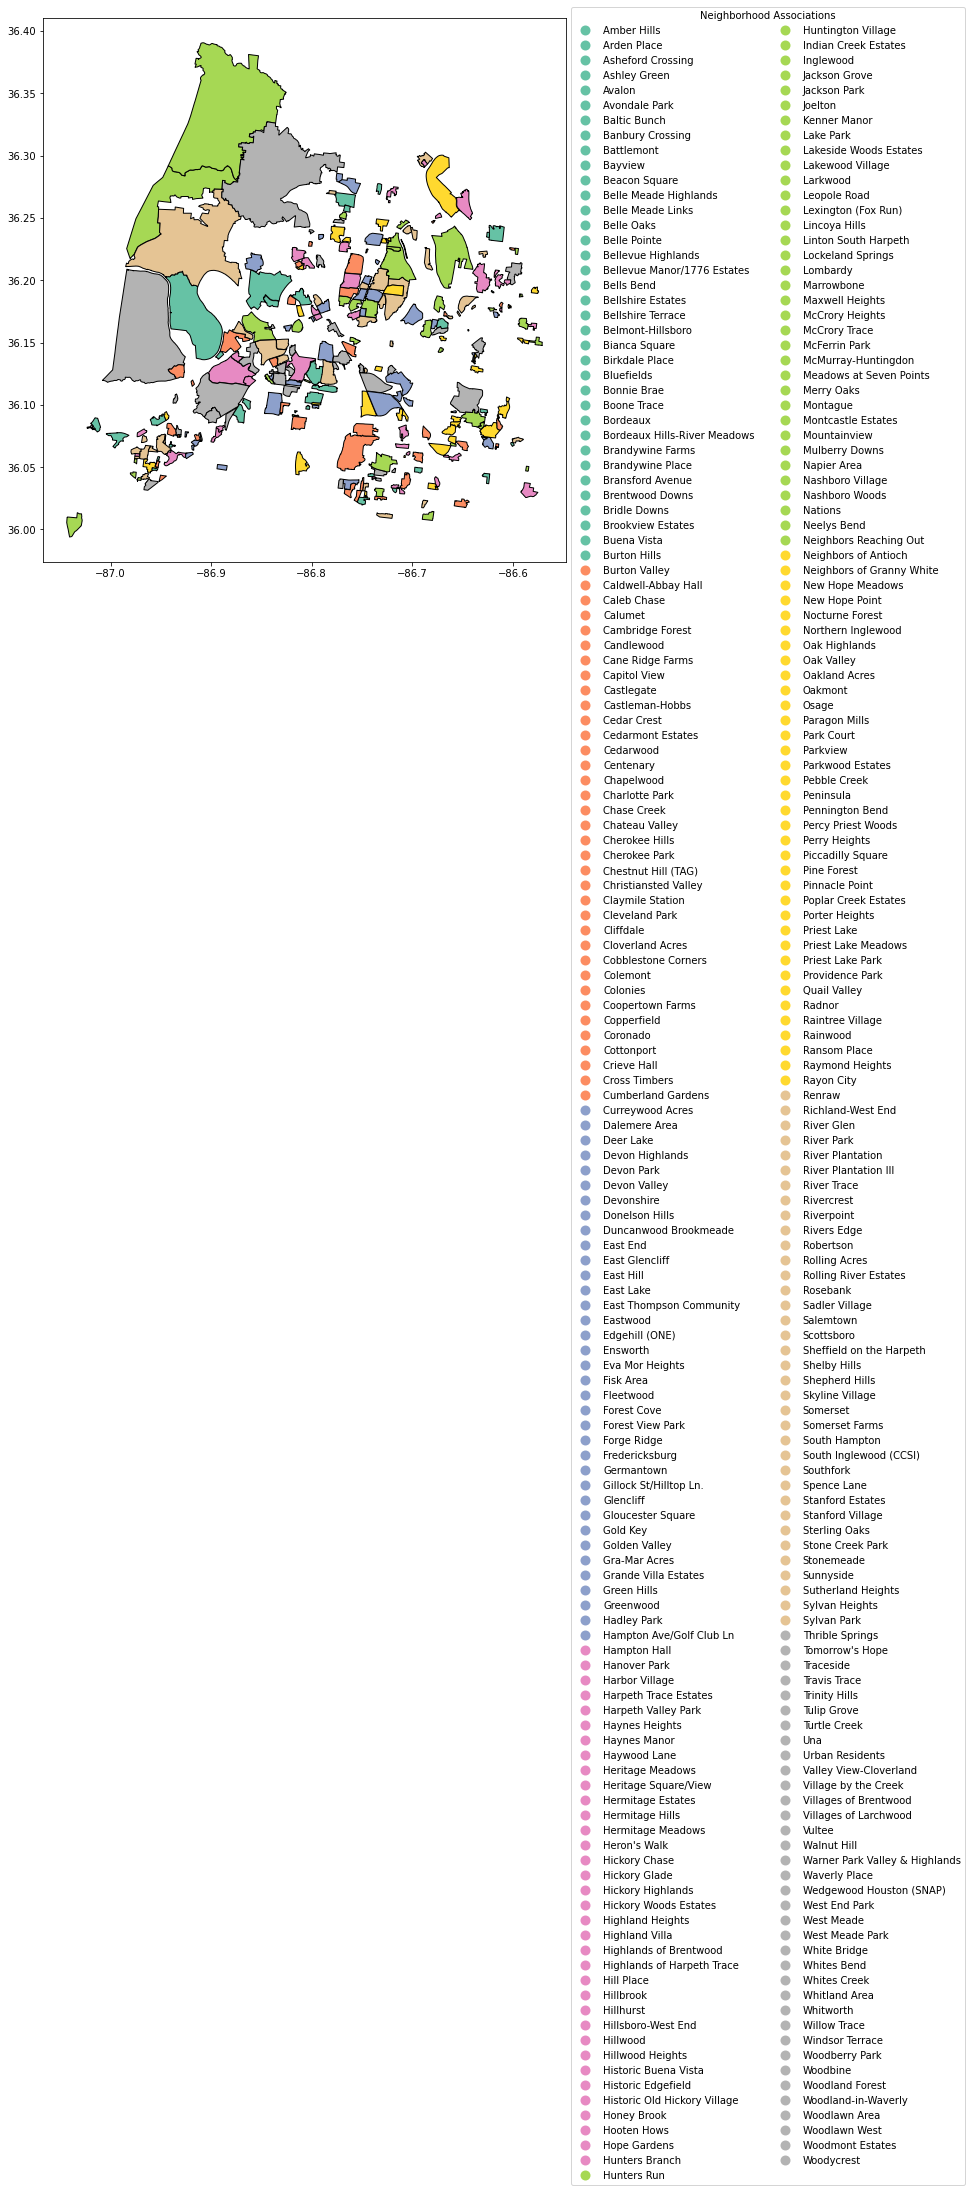

In [21]:
leg_kwds = {'title': 'Neighborhood Associations', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

neighborhoodab.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [22]:
bike_racks = pd.read_csv('../data/bike_racks.csv')
print(bike_racks.shape)
bike_racks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [23]:
bike_racks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    430 non-null    object 
 1   Type        430 non-null    object 
 2   OBJECTID    430 non-null    int64  
 3   Domain      430 non-null    object 
 4   Status      430 non-null    object 
 5   IDNumber    430 non-null    int64  
 6   Quantity    430 non-null    int64  
 7   Location    430 non-null    object 
 8   Capacity    430 non-null    int64  
 9   LON         426 non-null    float64
 10  LAT         426 non-null    float64
 11  Detail_Loc  430 non-null    object 
 12  Data_Colle  430 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


In [25]:
bike_racks['geometry'] = bike_racks.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bike_racks.head(3)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.6554527779 36.0499277778)
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.1852800378)
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)


In [26]:
neighborhoodab.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
bike_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = neighborhoodab.crs, 
                           geometry = bike_racks['geometry'])

In [28]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [29]:
neighborhoodab = neighborhoodab[['name', 'geometry']]

In [30]:
racks_by_nba = gpd.sjoin(bike_geo, neighborhoodab , op = 'within')

In [31]:
racks_by_nba.head()

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,name
4,POINT (-86.76218008308796 36.17245540617397),Rack,5,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17246),18,Historic Edgefield
111,POINT (-86.76031897312193 36.17222207326134),Rack,112,Public,Proposed,312,0,Elementary School,0,-86.760319,36.172222,Warner Elementary School,Health Dept,POINT (-86.76032 36.17222),18,Historic Edgefield
393,POINT (-86.75871967988238 36.17401627381623),Rack,394,Public,Future Artistic,415,0,Park,0,-86.758720,36.174016,East Park - Woodland St @ S 8th St,Civic,POINT (-86.75872 36.17402),18,Historic Edgefield
394,POINT (-86.76031268053083 36.17228797740811),Rack,395,Public,Future Artistic,416,0,Park,0,-86.760313,36.172288,East Park - Warner Public School Entrance,Civic,POINT (-86.76031 36.17229),18,Historic Edgefield
395,POINT (-86.7602654582043 36.17220968356596),Rack,396,Public,Future Artistic,417,0,Park,0,-86.760265,36.172210,East Park - Warner Public School Entrance,Civic,POINT (-86.76027 36.17221),18,Historic Edgefield


In [32]:
racks_by_nba['name'].value_counts()

Urban Residents                 51
Sylvan Park                     10
Hillsboro-West End               9
Nations                          6
Lockeland Springs                6
Woodbine                         6
Edgehill (ONE)                   6
Historic Edgefield               5
Glencliff                        4
Sunnyside                        4
Germantown                       4
Bordeaux                         4
Eastwood                         3
Capitol View                     3
Inglewood                        3
Historic Buena Vista             3
Napier Area                      2
Neighbors of Antioch             2
Hillwood                         2
Historic Old Hickory Village     2
Jackson Park                     2
Greenwood                        2
Chestnut Hill (TAG)              2
Shelby Hills                     2
Rosebank                         2
Highland Heights                 2
McFerrin Park                    2
Maxwell Heights                  2
Buena Vista         

In [33]:
racks_in_ur = racks_by_nba.loc[racks_by_nba['name'] == 'Urban Residents']
racks_in_ur.shape

(51, 16)

In [34]:
polygon_ur = neighborhoodab.loc[neighborhoodab['name'] == 'Urban Residents']
polygon_ur.shape

(1, 2)

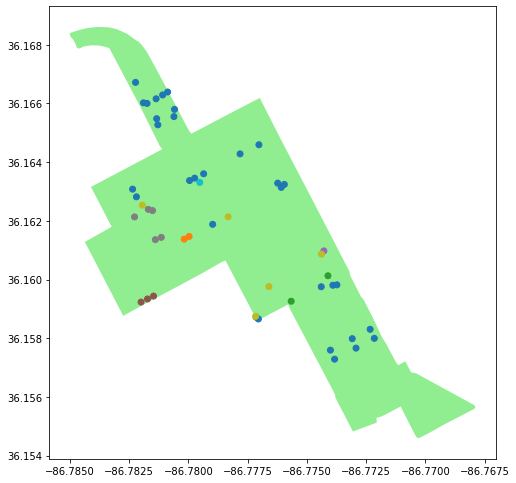

In [35]:
#fig, ax = matplotlib.subplots()
ax = polygon_ur.plot(figsize = (8, 10), color = 'lightgreen')
racks_in_ur.plot( ax = ax, column = 'Location');
plt.show();